Файли успішно завантажено.

Довжина першої вибірки: 99
Довжина другої вибірки: 1000
Для аналізу використовуємо перші 99 пар значень.
------------------------------------------------------------
Коефіцієнт кореляції (scipy): r = -0.0152
Коефіцієнт кореляції (ручний): r = -0.0152
P-значення (двостороннє): p = 0.8810
------------------------------------------------------------
ВИСНОВОК: Кореляція статистично НЕ значуща (p > 0.05).
Між вибірками немає лінійного зв'язку.


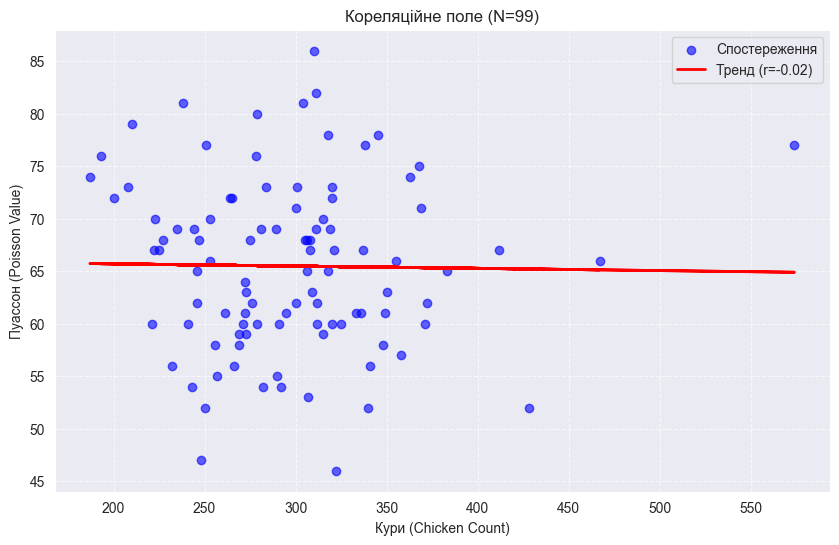

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ==========================================
# 1. ЗАВАНТАЖЕННЯ ТА ПІДГОТОВКА ДАНИХ
# ==========================================
df_chicken = pd.read_csv('chicken_population.csv')
data_x = df_chicken.iloc[:, 0].values # Вибірка X (Кури)

df_poisson = pd.read_csv('poisson_sample_30_100.csv')
data_y = df_poisson.iloc[:, 0].values # Вибірка Y (Пуассон)

# ==========================================
# 2. ВИРІВНЮВАННЯ ДОВЖИН (Slicing)
# ==========================================
# Кореляція вимагає пар (x_i, y_i).
# Ми беремо мінімальну довжину з двох масивів.
min_len = min(len(data_x), len(data_y))

# Обрізаємо обидва масиви до min_len
x_sliced = data_x[:min_len]
y_sliced = data_y[:min_len]

print(f"\nДовжина першої вибірки: {len(data_x)}")
print(f"Довжина другої вибірки: {len(data_y)}")
print(f"Для аналізу використовуємо перші {min_len} пар значень.")
print("-" * 60)

# ==========================================
# 3. РОЗРАХУНОК КОРЕЛЯЦІЇ ПІРСОНА
# ==========================================

# А) Використовуючи бібліотеку scipy (швидкий спосіб)
corr_coef, p_value = pearsonr(x_sliced, y_sliced)

# Б) "Ручний" розрахунок за формулою
# r = cov(X,Y) / (std(X) * std(Y))
mean_x = np.mean(x_sliced)
mean_y = np.mean(y_sliced)

numerator = np.sum((x_sliced - mean_x) * (y_sliced - mean_y))
denominator = np.sqrt(np.sum((x_sliced - mean_x)**2)) * np.sqrt(np.sum((y_sliced - mean_y)**2))
r_manual = numerator / denominator

print(f"Коефіцієнт кореляції (scipy): r = {corr_coef:.4f}")
print(f"Коефіцієнт кореляції (ручний): r = {r_manual:.4f}")
print(f"P-значення (двостороннє): p = {p_value:.4f}")

print("-" * 60)

# Інтерпретація результату
alpha = 0.05
if p_value > alpha:
    print("ВИСНОВОК: Кореляція статистично НЕ значуща (p > 0.05).")
    print("Між вибірками немає лінійного зв'язку.")
else:
    print("ВИСНОВОК: Кореляція статистично ЗНАЧУЩА (p < 0.05).")

    abs_r = abs(corr_coef)
    if abs_r < 0.3:
        strength = "дуже слабкий"
    elif abs_r < 0.5:
        strength = "слабкий"
    elif abs_r < 0.7:
        strength = "середній"
    else:
        strength = "сильний"

    print(f"Виявлено {strength} лінійний зв'язок.")

# ==========================================
# 4. ВІЗУАЛІЗАЦІЯ (SCATTER PLOT)
# ==========================================
plt.figure(figsize=(10, 6))

# Точки розсіювання
plt.scatter(x_sliced, y_sliced, color='blue', alpha=0.6, label='Спостереження')

# Лінія тренду (лінійна регресія)
m, b = np.polyfit(x_sliced, y_sliced, 1) # kx + b
plt.plot(x_sliced, m*x_sliced + b, color='red', linewidth=2, label=f'Тренд (r={corr_coef:.2f})')

plt.title(f'Кореляційне поле (N={min_len})')
plt.xlabel('Кури (Chicken Count)')
plt.ylabel('Пуассон (Poisson Value)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()